In [1]:
import pandas as pd
from scipy import stats
import numpy as np

In [3]:
 n = 130
std = 0.73
#sample mean = 98.25


In [4]:
sem = 0.73 / np.sqrt(n)
sem

0.06402523540941313

In [5]:
# alpha = confidence interval = 0.99
# dof = degree of freedom = n - 1 = 129
# loc = sample mean = 98.25
stats.t.interval(alpha=0.99, df=129, loc=98.25, scale=sem)

C:\Users\insan\AppData\Local\Temp\ipykernel_12928\4210961414.py:4: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  stats.t.interval(alpha=0.99, df=129, loc=98.25, scale=sem)


(98.08260738705933, 98.41739261294067)

EXERCISE 2. The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [6]:
#stats.t.interval(alpha, df, loc, scale)
        # alpha = confidence interval = 0.95
        # df = degree of freedom = n - 1 = 499
        # loc = sample mean = 5.4
        # scale = standart error of the mean(sem)
            # sem = std(x) / np.sqrt(n)
# std = 3.1, n = 500
sem = 3.1 / np.sqrt(500)
sem

0.13863621460498696

In [7]:
stats.t.interval(alpha=0.95, df=499, loc=5.4, scale=sem)

C:\Users\insan\AppData\Local\Temp\ipykernel_12928\560288637.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  stats.t.interval(alpha=0.95, df=499, loc=5.4, scale=sem)


(5.127617354510309, 5.672382645489692)

EXERCISE 3. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [8]:
# H0: mu = 13.20
# H1: mu < 12.20
xbar = 12.20
sigma = 2.50
n = 40
mu = 13.20
alpha = 0.01

In [9]:
z = (xbar - mu) / (sigma / np.sqrt(n))
z

-2.5298221281347035

In [11]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

In [12]:
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


EXERCISE 4.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [13]:
soil = pd.read_csv("soil.csv")
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [14]:
#Independent Samples T Test
alpha = 0.01
#H0: mSoil1 = mSoil2
#H1: mSoil1 != mSoil2

In [15]:
stats.levene(soil["Soil1"].dropna(), soil["Soil2"])

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [16]:
stats.ttest_ind(soil["Soil1"].dropna(), soil["Soil2"], equal_var=True, alternative="two-sided")

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [20]:
pvalue=2.593228732352821e-06

In [21]:
if pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


EXERCISE 5. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [22]:
pisa = pd.read_csv("pisa.csv")
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [23]:
pisa.shape


(70, 6)

In [24]:
pisa.groupby("Continent_Code").describe()

internet_users_per_100                                   \
                                count       mean        std        min   
Continent_Code                                                           
AF                                2.0  43.359918   7.297226  38.200000   
AS                               17.0  68.455613  21.086060  21.976068   
EU                               37.0  77.274888  12.425773  53.744979   
OC                                2.0  86.391704   2.589686  84.560519   
SA                                7.0  60.180494   9.772455  40.900000   

                                                            Math              \
                      25%        50%        75%        max count        mean   
Continent_Code                                                                 
AF              40.779959  43.359918  45.939877  48.519836   2.0  363.212100   
AS              50.300000  74.000000  84.948353  92.884826  17.0  466.216647   
EU              68.632900  76.184000  87.479056  98.200000  37.0  477.981449   
OC              85.476112  86.391704  87.307296  88.222889   2.0  494.559750   
SA              57.116462  64.289000  66.321532  69.198471   7.0  402.887700   

                ...     Reading           Science                         \
                ...         75%       max   count        mean        std   
Continent_Code  ...                                                        
AF              ...  358.256450  361.0555     2.0  381.074250   7.536556   
AS              ...  508.690500  535.1002    17.0  467.945847  56.671371   
EU              ...  499.814600  526.4247    37.0  478.299381  34.450616   
OC              ...  507.678175  509.2707     2.0  511.648700   2.340241   
SA              ...  431.922700  458.5709     7.0  421.747186  18.470319   

                                                                       
                     min         25%        50%         75%       max  
Continent_Code                                                         
AF              375.7451  378.409675  381.07425  383.738825  386.4034  
AS              386.4854  417.611200  456.48360  523.277400  555.5747  
EU              383.6824  460.774900  490.22500  501.936900  534.1937  
OC              509.9939  510.821300  511.64870  512.476100  513.3035  
SA              396.6836  408.205450  424.59050  433.794600  446.9561  

[5 rows x 32 columns]

In [25]:
eu_math = pisa[pisa["Continent_Code"] == "EU"]["Math"]

In [26]:
as_math = pisa[pisa["Continent_Code"] == "AS"]["Math"]

In [27]:
#Independent Samples T Test
alpha = 0.05
#H0: mEU = mAS
#H1: mEU != mAS

In [28]:
OneSamp = stats.ttest_ind(eu_math, as_math, equal_var=True, alternative="two-sided")
OneSamp

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [29]:
if OneSamp.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


In [30]:
import seaborn as sns
import matplotlib as plt

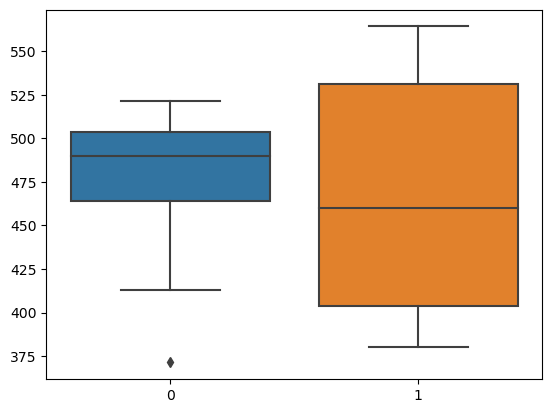

In [31]:
sns.boxplot(data=[eu_math, as_math], dodge=False);